In [12]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('daily-website-visitors.csv')


In [3]:
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


In [4]:
data = data.filter(['Page.Loads'])


In [5]:
# Lấy 100 dòng cuối cùng của df
data = data.tail(1000)
data

,Page.Loads
1167,2658
1168,2391
1169,3202
1170,4349
1171,4886
...,...
2162,2221
2163,2724
2164,3456
2165,3581


In [6]:
#Tiền xử lý
data.fillna(0, inplace=True)

# Normalize data
scaler = MinMaxScaler()
dataScale = scaler.fit_transform(data.values.reshape(-1,1))

In [7]:
# Hàm tính giá trị alpha tối ưu
def optimum_alpha(X):
    X_max = np.max(X)
    X_min = np.min(X)
    n = len(X)
    return ((X_max - X_min) - (1/n) * np.sum(X)) / (X_max - X_min)


In [8]:
def smoothed(X, alpha):
    S = np.zeros_like(X)
    S[0] = X[0]
    for i in range(1, len(X)):
        S[i] = S[i-1] + alpha*(X[i] - S[i-1])
    return S

In [9]:
alpha = optimum_alpha(dataScale)


In [10]:
S = smoothed(dataScale, alpha)
print("Giá trị alpha tối ưu:", alpha)
print("Chuỗi ban đầu:", dataScale)
print("Chuỗi đã được làm mịn:", S)


Giá trị alpha tối ưu: 0.5528196155001501
Chuỗi ban đầu: [[0.20006008]
 [0.15995795]
 [0.2817663 ]
 [0.45404025]
 [0.5346951 ]
 [0.48498047]
 [0.47326524]
 [0.33808952]
 [0.16581556]
 [0.31886452]
 [0.54505858]
 [0.47296485]
 [0.49098828]
 [0.46936017]
 [0.31420847]
 [0.19209973]
 [0.32397116]
 [0.49939922]
 [0.40597777]
 [0.44397717]
 [0.42234905]
 [0.42114749]
 [0.18849504]
 [0.30474617]
 [0.47401622]
 [0.48933614]
 [0.41754281]
 [0.30820066]
 [0.16821868]
 [0.01817363]
 [0.        ]
 [0.04250526]
 [0.17347552]
 [0.22108741]
 [0.22273956]
 [0.13367378]
 [0.03304296]
 [0.00195254]
 [0.05752478]
 [0.30985281]
 [0.3101532 ]
 [0.35626314]
 [0.32817663]
 [0.14313608]
 [0.2246921 ]
 [0.43766897]
 [0.44953439]
 [0.43526585]
 [0.37113247]
 [0.27996395]
 [0.10093121]
 [0.17858216]
 [0.39411235]
 [0.40657855]
 [0.44202463]
 [0.42024632]
 [0.28567137]
 [0.14433764]
 [0.24331631]
 [0.49294082]
 [0.51967558]
 [0.51036347]
 [0.46425353]
 [0.3385401 ]
 [0.15304896]
 [0.27696005]
 [0.53109042]
 [0.49

D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Smooth')

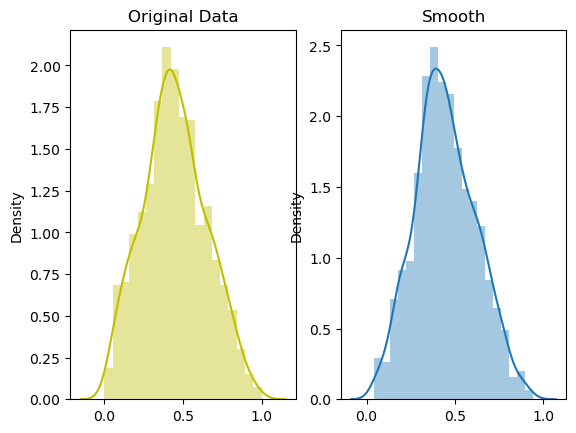

In [13]:
import seaborn as sns

fig, ax=plt.subplots(1,2)
sns.distplot(dataScale, ax=ax[0], color='y')
ax[0].set_title("Original Data")


sns.distplot(S,ax=ax[1])
ax[1].set_title("Smooth")


In [14]:
#Chia dữ liệu thành train test
data = pd.DataFrame(S)

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [15]:
data = train_data

#dataScale = data
train_percent = 0.8
train_size = int(len(data) * train_percent)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [16]:
#Chuẩn bị dữ liệu để đưa vào mô hình
def prepare_data(data, size_window,size_predict,stepWindow):
    X, y = [], []
    startWindow = 0
    for i in range(len(data) - size_window - 1):
        if (len(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0]) != size_predict):
            break
        X.append(data[startWindow:(startWindow + size_window), :])
        y.append(data[(startWindow + size_window):(startWindow + size_window + size_predict) , 0])
          
       
        startWindow += stepWindow
    return np.array(X), np.array(y)


size_window = 7
size_predict = 1
stepWindow = 1
X_train, y_train = prepare_data(train_data.values, size_window, size_predict, stepWindow)
X_test, y_test = prepare_data(test_data.values, size_window, size_predict, stepWindow)

In [18]:
start_time = time.time()

# Tạo một list chứa các số không phải là số lucas
number_list = [5,6,8,9]

# Chọn số lượng hidden layer sử dụng theo số
num_hidden_layer = number_list[0] # ví dụ chọn số 5

In [19]:

# Tạo mô hình CNN
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(size_window, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
for i in range(num_hidden_layer): #Thêm num_hidden_layer lớp ẩn với 64 đơn vị mỗi lớp
    model.add(Dense(units=100, activation='relu')) #Tham số chỉ định số lượng tế bào thần kinh trong lớp
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

# Compile mô hình với Adam optimizer và Mean Squared Error loss
model.compile(loss='mse', optimizer='adam')


In [20]:
history = model.fit(X_train, y_train, epochs=10000, batch_size=16)

Epoch 1/10000
40/40 [==============================] - 2s 2ms/step - loss: 0.1065
Epoch 2/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 3/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 4/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 5/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 6/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 7/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 8/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 9/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 10/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 11/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 12/10000
40/40 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 13/1000

KeyboardInterrupt: 

In [166]:
y_pred = model.predict(X_test)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

5/5 [==============================] - 0s 2ms/step
Training time: 1237.6649057865143 seconds


In [167]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, (-1, 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAPE: ', mape)

5/5 [==============================] - 0s 1ms/step
MSE:  0.031235491176218908
RMSE:  0.17673565338159392
MAPE:  0.6281570516434056
